In [1]:
import os
import numpy as np
from PIL import Image

# Define data directories (adjust paths if necessary)
train_dir = directory="C:\\Users\\Tejaswi\\OneDrive\\Documents\\EMOTION DETECTION\\Emotiondetection1\\train"
test_dir = directory="C:\\Users\\Tejaswi\\OneDrive\\Documents\\EMOTION DETECTION\\Emotiondetection1\\test"

In [2]:
# Define the function to preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert image to grayscale
    image = image.resize((64, 64))  # Resized to 64x64 as specified in input_shape
    image = np.array(image)
    image = image.astype('float32')
    image /= 255.0
    image = (image - 0.5) * 2.0  # Apply contrast enhancement
    return image

In [3]:
# Load training and test data
train_data = []
test_data = []

for class_name in os.listdir(train_dir):
    for image_file in os.listdir(os.path.join(train_dir, class_name)):
        image_path = os.path.join(train_dir, class_name, image_file)
        image = preprocess_image(image_path)
        label = class_name  # Extract label from class name
        train_data.append((image, label))  # Append as a tuple (image, label)

for class_name in os.listdir(test_dir):
    for image_file in os.listdir(os.path.join(test_dir, class_name)):
        image_path = os.path.join(test_dir, class_name, image_file)
        image = preprocess_image(image_path)
        label = class_name  # Extract label from class name
        test_data.append((image, label))  # Append as a tuple (image, label)

In [4]:
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

In [5]:
# Define a dictionary to map string labels to integers
label_map = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6  # Add the missing label mapping
}

# Convert string labels to integers using the label_map
train_labels = np.array(list(map(lambda x: label_map[x], train_labels)))
test_labels = np.array(list(map(lambda x: label_map[x], test_labels)))

In [6]:
# Convert labels to one-hot encoded format (if needed)
# if using categorical crossentropy loss:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Reshape images (if necessary)
input_shape = (64, 64, 1)  # Assuming grayscale images
train_images = np.array([image.reshape(input_shape) for image in train_images])
test_images = np.array([image.reshape(input_shape) for image in test_images])

MODEL

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Add a dropout layer after the convolutional layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Add a dropout layer after the convolutional layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Add a dropout layer after the convolutional layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes for FER2013
])

c:\Users\Tejaswi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,306,375 (4.98 MB)

 Trainable params: 1,306,375 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5) 

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.3315 - loss: 1.6600 - val_accuracy: 0.4975 - val_loss: 1.3123 - learning_rate: 0.0010
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 69s 77ms/step - accuracy: 0.4891 - loss: 1.3136 - val_accuracy: 0.5341 - val_loss: 1.2127 - learning_rate: 0.0010
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.5554 - loss: 1.1611 - val_accuracy: 0.5564 - val_loss: 1.1562 - learning_rate: 0.0010
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.5931 - loss: 1.0790 - val_accuracy: 0.5768 - val_loss: 1.1283 - learning_rate: 0.0010
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.6253 - loss: 0.9857 - val_accuracy: 0.5791 - val_loss: 1.1343 - learning_rate: 0.0010
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 103ms/step - accuracy: 0.6657 - loss: 0.8876 - val_accuracy: 0.5861 - val_loss: 1.1094 - learning_rate: 0.0010
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 103s 115ms/step - accurac

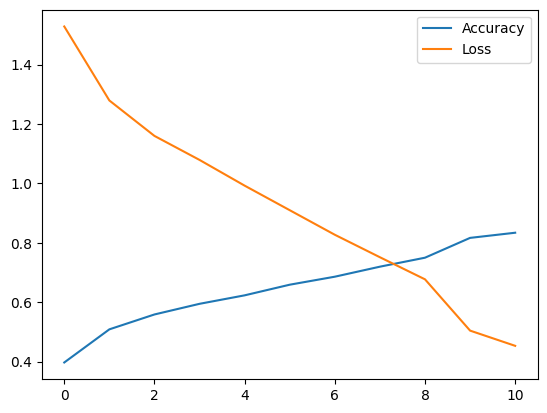

In [13]:
# Import libraries
import matplotlib.pyplot as plt

# Initialize lists to store history
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[early_stopping, reduce_lr])

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

In [14]:
# Evaluate the model
model_loss, model_accuracy = model.evaluate(test_images, test_labels)

# Print the evaluation results
print('Loss:', model_loss)
print('Accuracy:', model_accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5545 - loss: 1.5315
Loss: 1.368800163269043
Accuracy: 0.6028141379356384


In [15]:
final_accuracy = history.history['accuracy'][-1]
print("Final Accuracy:", final_accuracy)

Final Accuracy: 0.8339893221855164
